# Data Analysis On Telecom

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading Data](#section3)<br>
    3.1 [Importing Dataset from events_data](#section301)<br>
    3.2 [Indentify Missing Values of events_data](#section302)<br>
    3.3 [Importing Dataset from gender_age_train](#section303)<br>
    3.4 [Indentify Missing Values of gender_age_train](#section304)<br>
    3.5 [Importing Dataset from phone_brand_device_model](#section305)<br>
    3.6 [Indentify Missing Values of phone_brand_device_model](#section306)<br>
4. [Data Preprocessing](#section4)<br>
    4.1 [Preprocessing](#section401)<br>
    4.2 [Statistics of events data](#section402)<br>
5. [Exploratory Data Analysis](#section5)<br>
    5.1 [Analysis based on state](#section501)<br>
    5.2 [Distribution of customers on Map](#section502)<br>
    5.3 [Frequency of Events with respect to Time](#section503)<br>
    5.4 [Analysis based on gender](#section504)<br>
    5.5 [Analysis based on age_group](#section505)<br>
    5.6 [Analysis based on phone brand](#section506)<br>
    5.7 [Analysis based on phone model](#section507)<br>
    5.8 [Common phone_id between gender and phone tables](#section508)<br>
    5.9 [Combine gender and phone tables](#section509)<br>
    5.10 [Group latitude and longitude](#section5010)<br>
    5.11 [Latitude and longitude plotted on Map](#section5011)<br>
6. [Conclusion](#section6)<br>

<a id=section1></a>
## 1. Problem Statement

One of the leading __telecom__ players, understands that __customizing offering__
is very important for its __business to stay competitive__. Data from more than 60% of the 50 million 
mobile devices active daily in India to help its clients better understand and interact with their audiences. Data analysis done for the following states WestBengal, Karnataka, Gujarat, Bihar, Punjab and Kerala.

<a id=section2></a>
## 2. Import Packages

In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

import mysql.connector as sql
import pandas_profiling

from googletrans import Translator
from translate import Translator
import folium
import gmplot

import warnings
warnings.filterwarnings('ignore')

<a id=section3></a>
## 3. Loading Data

<a id=section301></a>
### 3.1 Importing Dataset from events_data

In [2]:
# Importing dataset from local directory
eventFile = "E:/Document/CapstoneProject/Data/events_data.csv"

# Get current working directory
pwd = os.getcwd()
# Change the directory to file location
os.chdir(os.path.dirname(eventFile))
# Create dataframe from dataset
df_event = pd.read_csv(os.path.basename(eventFile))
# Again change to current working directory
os.chdir(pwd)

df_event_states = df_event.query("state=='WestBengal' | state=='Karnataka' | state=='Gujarat' | state=='Bihar' | state=='Punjab' | state=='Kerala'")
df_event_states.head()

,event_id,device_id,timestamp,longitude,latitude,city,state
2829979,74778.0,6.173131e+18,2016-05-01 08:02:02,88.39748,22.65216,Calcutta,WestBengal
2829980,527238.0,6.173131e+18,2016-05-02 21:03:22,88.39748,22.65216,Calcutta,WestBengal
2829981,1264753.0,6.173131e+18,2016-05-06 21:36:26,88.39748,22.65216,Calcutta,WestBengal
2829982,2252310.0,6.173131e+18,2016-05-03 23:02:19,88.39748,22.65216,Calcutta,WestBengal
2829983,2318262.0,6.173131e+18,2016-05-03 09:11:20,88.39748,22.65216,Calcutta,WestBengal


In [3]:
df_event_states.shape

(422915, 7)

#### Observations:

- There are **422915 rows** and **7 columns**

In [4]:
df_event_states.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422915 entries, 2829979 to 3252949
Data columns (total 7 columns):
event_id     422915 non-null float64
device_id    422867 non-null float64
timestamp    422915 non-null object
longitude    422873 non-null float64
latitude     422873 non-null float64
city         422915 non-null object
state        422915 non-null object
dtypes: float64(4), object(3)
memory usage: 25.8+ MB


#### Observations:

- **event_id, device_id, longitude, latitude** are float datatypes
- **timestamp, city, state** are object datatypes

<a id=section302></a>
### 3.2 Indentify Missing Values of events_data

In [5]:
df_event_states.isnull().sum()

event_id      0
device_id    48
timestamp     0
longitude    42
latitude     42
city          0
state         0
dtype: int64

#### Observations:

- There are **missing values** in **device_id, longitude and latitude**

<a id=section303></a>
### 3.3 Importing Dataset from gender_age_train

In [6]:
db_connection = sql.connect(user='student',password='student',host='cpanel.insaid.co',database='Capstone1')
db_cursor = db_connection.cursor()
db_cursor.execute('SELECT * FROM gender_age_train')

table_rows = db_cursor.fetchall()
df_gender = pd.DataFrame(table_rows)
df_gender.head()

,0,1,2,3
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [7]:
df_gender.shape

(74645, 4)

#### Observations:

- There are **74645 rows** and **4 columns** in **gender_age_train** table

In [8]:
df_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
0    74645 non-null int64
1    74645 non-null object
2    74645 non-null int64
3    74645 non-null object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


#### Observations:

- **1 and 3** columns are **int** datatype
- **2 and 4** columns are **object** datatype in **gender_age_train** table

<a id=section304></a>
### 3.4 Identify Missing Values of gender_age_train

In [9]:
df_gender.isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

#### Observations:

- There is **no missing values** in **gender_age_train** table

<a id=section305></a>
### 3.5 Importing Dataset from phone_brand_device_model

In [10]:
db_connection = sql.connect(user='student',password='student',host='cpanel.insaid.co',database='Capstone1')
db_cursor = db_connection.cursor()
db_cursor.execute('SELECT * FROM phone_brand_device_model')

table_rows = db_cursor.fetchall()
df_phone = pd.DataFrame(table_rows)
df_phone.head()

,0,1,2
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


In [11]:
df_phone.shape

(87726, 3)

#### Observations:

- There are **87726 rows** and **3 columns** in **phone_brand_device_model** table

In [12]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
0    87726 non-null int64
1    87726 non-null object
2    87726 non-null object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


#### Observations:

- **Column 1** is **int** datatype
- **Columns 2 and 3** are **object** datatype

<a id=section306></a>
### 3.6 Identify Missing Values of phone_brand_device_model

In [13]:
df_phone.isnull().sum()

0    0
1    0
2    0
dtype: int64

#### Observations:

- There are **no missing values**

<a id=section4></a>
## 4. Data Preprocessing

<a id=section401></a>
### 4.1 Preprocessing

- Find the mapping values of longitude for device_id

In [14]:
mapping_longitude = (df_event_states.query('longitude != "NaN"')
             .drop_duplicates('device_id')
             .set_index('device_id')
             .longitude)

- Filling null values of longitude with matching device_id

In [15]:
df_event_states['longitude'] = df_event_states['device_id'].map(mapping_longitude).fillna('NaN')

- Find the mapping values of latitude for device_id

In [16]:
mapping_latitude = (df_event_states.query('latitude != "NaN"')
             .drop_duplicates('device_id')
             .set_index('device_id')
             .latitude)

- Filling null values of latitude with matching device_id

In [17]:
df_event_states['latitude'] = df_event_states['device_id'].map(mapping_latitude).fillna('NaN')

- Find the mapping values of device_id for longitude

In [18]:
mapping_device_id = (df_event_states.query('device_id != "NaN"')
             .drop_duplicates('longitude')
             .set_index('longitude')
             .device_id)

- Filling null values of device_id with matching longitude

In [19]:
df_event_states['device_id'] = df_event_states['longitude'].map(mapping_device_id).fillna('NaN')

- Check any null values are there or not

In [20]:
df_event_states.isnull().sum()

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64

- Write to .csv file for submission

In [21]:
df_event_states.to_csv("EventsData.csv", index=False)

- Rename the columns in phone table

In [22]:
df_phone.columns = ['phone_id', 'brand', 'model']

- Column added for phone brand english name

In [23]:
brand_english = {'华为':'Huawei', '小米':'Xiaomi', '三星':'Samsung', 'vivo':'vivo', 'OPPO':'OPPO', '魅族':'Meizu', '酷派':'Coolpad', '乐视':'LeEco', '联想':'Lenovo', 'HTC':'HTC'}
df_phone.loc[:,'brand_english']=df_phone['brand'].map(brand_english)

In [24]:
df_phone.head()

,phone_id,brand,model,brand_english
0,1877775838486905855,vivo,Y13,vivo
1,-3766087376657242966,小米,V183,Xiaomi
2,-6238937574958215831,OPPO,R7s,OPPO
3,8973197758510677470,三星,A368t,Samsung
4,-2015528097870762664,小米,红米Note2,Xiaomi


- Rename the columns in gender table

In [25]:
df_gender.columns = ['phone_id', 'gender', 'age', 'age_group']

In [26]:
df_gender.head()

,phone_id,gender,age,age_group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


<a id=section402></a>
### 4.2 Statistics of events data

In [27]:
df_event_states.describe()

,event_id,device_id,longitude,latitude
count,4.229150e+05,4.229150e+05,422915.000000,422915.000000
mean,1.635566e+06,5.290252e+16,82.335375,20.793167
std,9.309147e+05,5.335819e+18,6.378784,5.423993
min,2.088100e+04,-9.221066e+18,69.612421,8.412438
25%,8.229240e+05,-4.580846e+18,76.550601,15.204908
50%,1.632964e+06,1.274328e+17,85.519033,22.620531
75%,2.443410e+06,4.703286e+18,88.408053,23.104146
max,3.252946e+06,9.222849e+18,89.622073,32.369606


<a id=section5></a>
## 5. Exploratory Data Analysis

<a id=section501></a>
### 5.1 Analysis based on state

Text(0, 0.5, 'Frequency')

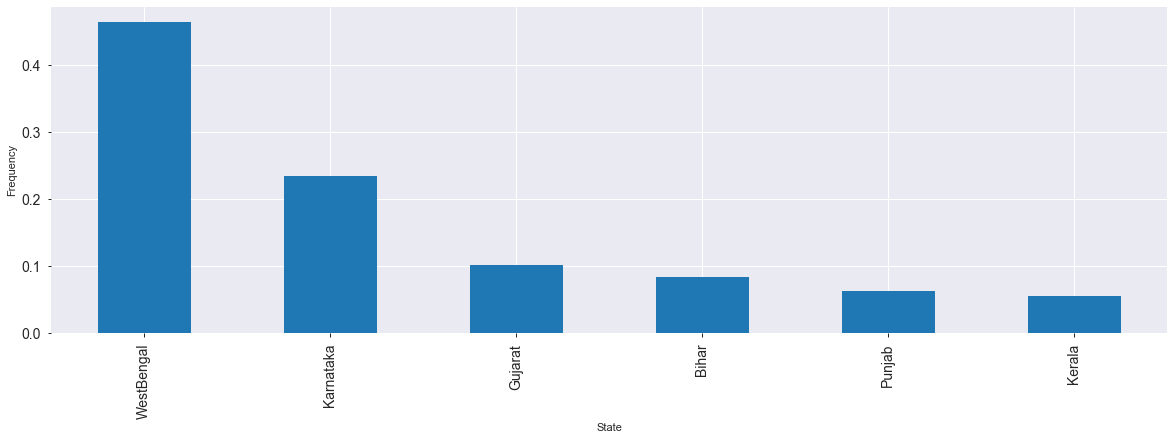

In [28]:
df_event_states['state'].value_counts(normalize=True).plot(figsize=(20,6), kind='bar', fontsize=14)
plt.xlabel('State')
plt.ylabel('Frequency')

__Observations:__
- Almost **47%** of customers from **WestBengal** followed by **Karnataka and Gujarat** having **22% and 10%** respectively.

<a id=section502></a>
### 5.2 Distribution of customers on Map

In [29]:
# Store our latitude and longitude values
latitudes = df_event_states["latitude"]
longitudes = df_event_states["longitude"]

# Creating the location we would like to initialize the focus on. 
# Parameters: Lattitude, Longitude, Zoom
gmap = gmplot.GoogleMapPlotter(22.65216, 88.39748, 10)

# Overlay our datapoints onto the map
gmap.heatmap(latitudes, longitudes)

# Generate the heatmap into an HTML file
gmap.draw("events_data_heatmap.html")

<a id=section503></a>
### 5.3 Frequency of Events with respect to Time

Text(0, 0.5, 'Frequency')

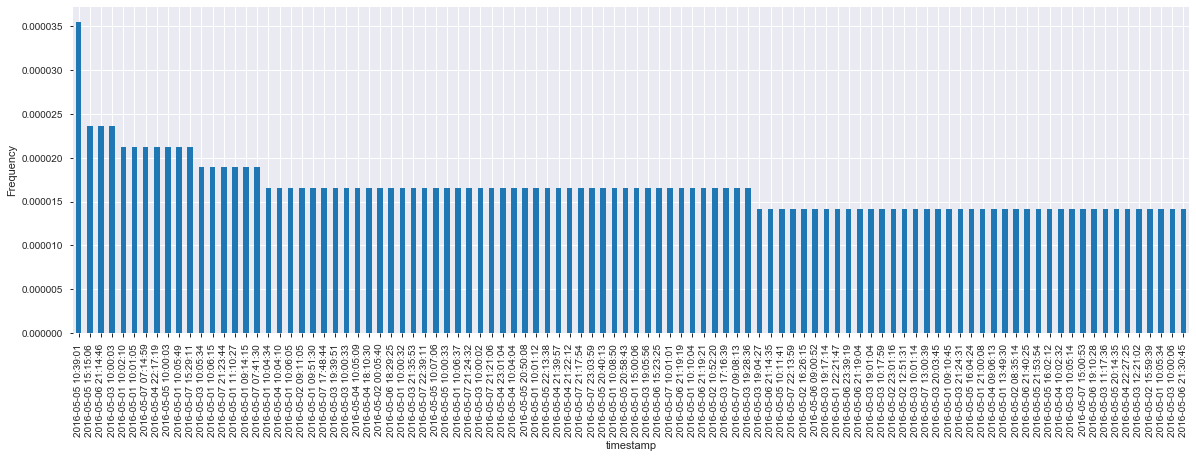

In [30]:
df_event_states['timestamp'].value_counts(normalize=True)[:100].plot(figsize=(20,6), kind='bar')
plt.xlabel('timestamp')
plt.ylabel('Frequency')

<a id=section504></a>
### 5.4 Analysis based on gender

Text(0, 0.5, 'Frequency')

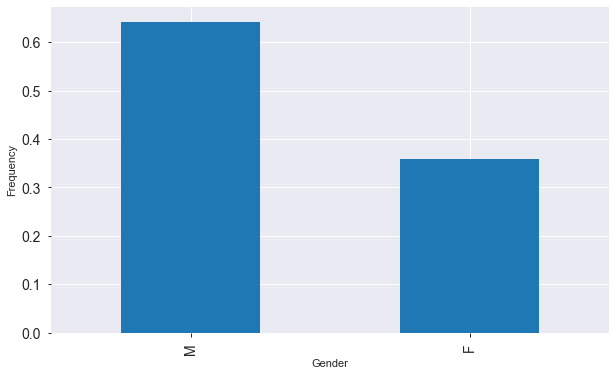

In [31]:
df_gender['gender'].value_counts(normalize=True).plot(figsize=(10,6), kind='bar', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Frequency')

#### Observations:

- **64%** of users of phone are males

<a id=section505></a>
### 5.5 Analysis based on age_group

Text(0, 0.5, 'Frequency')

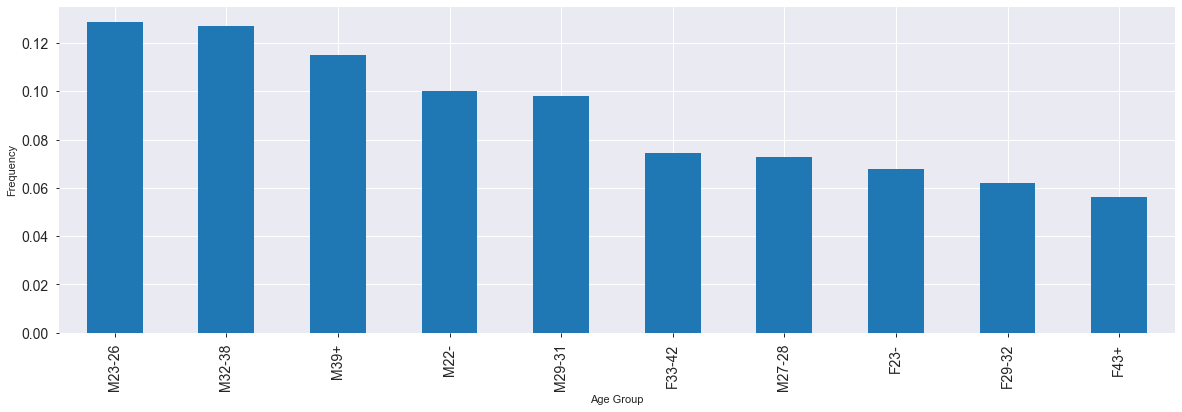

In [32]:
df_gender['age_group'].value_counts(normalize=True)[:10].plot(figsize=(20,6), kind='bar', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Frequency')

#### Observations:

- Almost **12.9% of users** between **age 23 to 26** and **24.2% of users above age 32** are **males** the **maximum** users of phone
- **9.8% of users** between **age 24 to 28** and **5.6% of users above age 43** are **females** the **least** users of phone

<a id=section506></a>
### 5.6 Analysis based on phone brand 

Text(0, 0.5, 'Frequency')

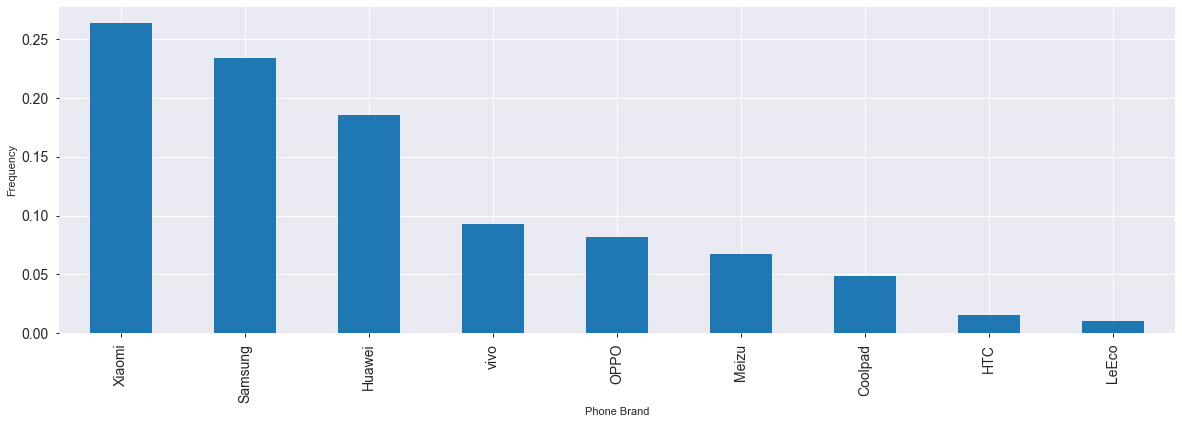

In [33]:
df_phone['brand_english'].value_counts(normalize=True)[:10].plot(figsize=(20,6), kind='bar', fontsize=14)
plt.xlabel('Phone Brand')
plt.ylabel('Frequency')

#### Observations:

- **Top 3** selling brands are **Xiaomi, Samsung and Huawei** with **26%, 24% and 19%** of users respectively.
- Following these brands **vivo, OPPO** have quite number of customers.

<a id=section507></a>
### 5.7 Analysis based on phone model

Text(0, 0.5, 'Frequency')

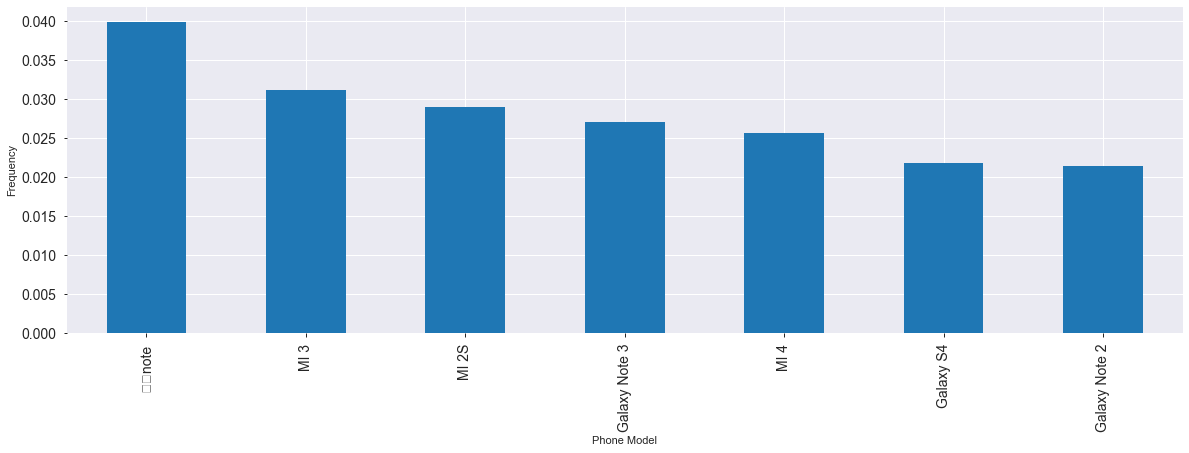

In [34]:
df_phone['model'].value_counts(normalize=True)[:7].plot(figsize=(20,6), kind='bar', fontsize=14)
plt.xlabel('Phone Model')
plt.ylabel('Frequency')

#### Observations:

- **Top 3** selling models are **Red ricenote, MI 3 and MI 2S** with **4%, 3.1% and 2.9%** of users respectively.
- Following these models **Galaxy Note 3, MI 4** have quite number of customers.

<a id=section508></a>
### 5.8 Common phone_id between gender and phone tables

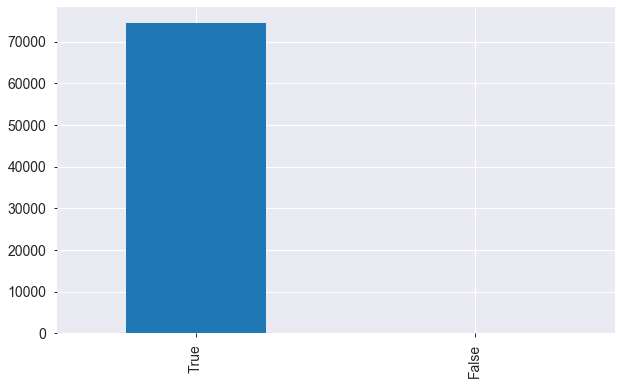

In [35]:
df_gender['phone_id'].isin(df_phone['phone_id']).value_counts().plot(figsize=(10,6), kind='bar', fontsize=14)

#### Observations:

- **74617 phone_id**s are same between **gender and phone** tables.
- **28 phone_id**s are not matching between 2 tables.

<a id=section509></a>
### 5.9 Combine gender and phone tables

In [36]:
df_phone_user = pd.merge(df_gender, df_phone, on='phone_id', how='inner')
df_phone_user.head()

,phone_id,gender,age,age_group,brand,model,brand_english
0,-8076087639492063270,M,35,M32-38,小米,MI 2,Xiaomi
1,-2897161552818060146,M,35,M32-38,小米,MI 2,Xiaomi
2,-8260683887967679142,M,35,M32-38,小米,MI 2,Xiaomi
3,-4938849341048082022,M,30,M29-31,三星,Galaxy S4,Samsung
4,245133531816851882,M,30,M29-31,SUGAR,时尚手机,NaN


In [37]:
df_phone_user.shape

(74617, 7)

In [39]:
df_age_brand = df_phone_user.groupby(['age_group', 'brand_english']).size().sort_values(ascending=False)
print(df_age_brand)

age_group  brand_english
M23-26     Xiaomi           2471
M32-38     Xiaomi           2285
           Samsung          2188
M39+       Xiaomi           2061
           Samsung          1973
M23-26     Samsung          1932
M22-       Xiaomi           1917
M29-31     Xiaomi           1791
M32-38     Huawei           1744
M39+       Huawei           1726
M29-31     Samsung          1580
M23-26     Huawei           1545
M27-28     Xiaomi           1403
F33-42     Xiaomi           1377
M22-       Samsung          1371
M29-31     Huawei           1365
F33-42     Samsung          1332
M22-       Huawei           1169
M27-28     Samsung          1166
F23-       Xiaomi           1155
F29-32     Xiaomi           1139
F43+       Samsung          1103
F29-32     Samsung          1076
F24-26     Xiaomi           1066
F23-       Samsung           999
F33-42     Huawei            971
F43+       Xiaomi            932
F24-26     Samsung           885
M27-28     Huawei            856
M23-26     vivo   

#### Observations:

- **Xiaomi and Samsung** are preferred brands in **males** in **age** group between **23 to 26** 
    with **3.3% and 2.6%** of users respectively.
- **Xiaomi and Samsung** are preferred brands in **males** above **age 32** with **5.8% and 5.6%** of users respectively.
- Around **1.8% of users** are **females** in age group between **33 to 42** preferred **Xiaomi and Samsung**.

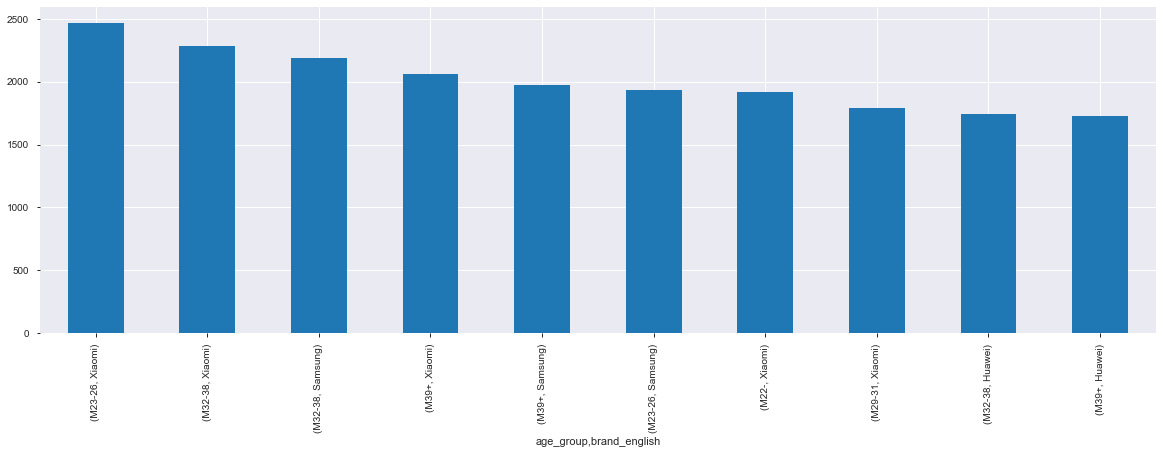

In [40]:
df_age_brand[:10].plot(figsize=(20,6), kind='bar')

In [41]:
df_age_model = df_phone_user.groupby(['age_group', 'model']).size().sort_values(ascending=False)
print(df_age_model)

age_group  model          
M32-38     红米note             379
M39+       红米note             375
M23-26     红米note             354
           MI 2S              309
M29-31     红米note             296
M23-26     MI 3               293
           MI 4               293
M22-       MI 3               289
M32-38     Galaxy Note 3      289
M22-       红米note             262
           MI 2S              260
M32-38     MI 3               260
F33-42     红米note             246
M32-38     MI 4               242
M39+       MI 3               242
           Galaxy Note 3      240
M23-26     Galaxy Note 3      226
M32-38     MI 2S              225
M29-31     MI 3               225
M32-38     Galaxy S4          218
M39+       MI 2S              211
           MI 4               210
M27-28     红米note             208
F29-32     红米note             207
M39+       Galaxy Note 2      204
M32-38     Galaxy Note 2      203
M22-       MI 4               201
M29-31     MI 2S              200
M23-26     Galaxy S4 

#### Observations:

- **Red rice note** is mostly preferred by **males** above **age 29**
- **Males** in age group between **23 to 26** preferred **Red rice note** followed by **MI 2S**
- Maximum number of **females** in age group between **33 to 42** preferred **Red rice note** followed by **Galaxy Note 3**

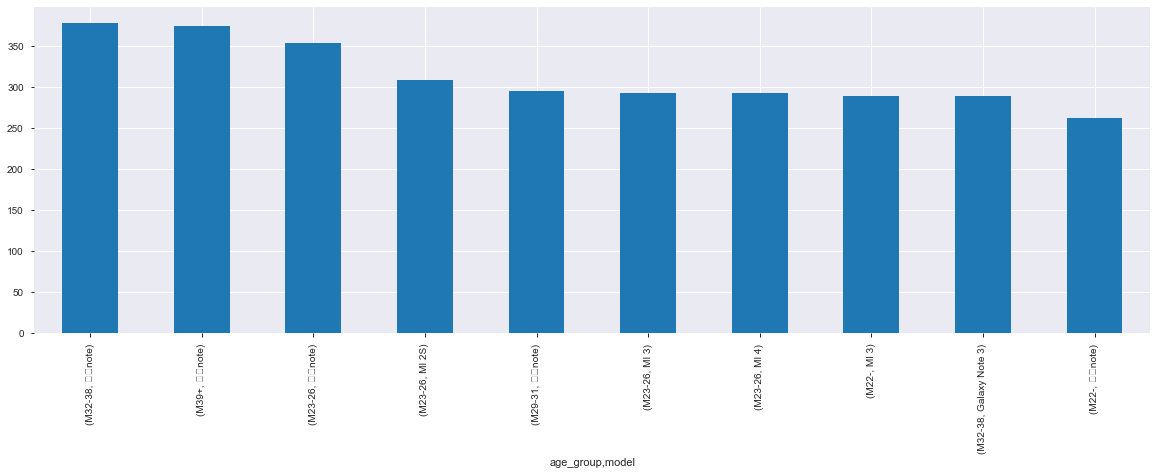

In [42]:
df_age_model[:10].plot(figsize=(20,6), kind='bar')

<a id=section5010></a>
### 5.10 Group latitude and longitude

In [44]:
df_event_states.groupby(['latitude', 'longitude']).size().sort_values(ascending=False)

latitude   longitude
12.715878  77.209356    892
22.957980  87.812710    761
27.177397  84.140900    547
25.484459  88.619418    535
26.211919  87.570736    496
21.790693  70.686387    476
30.904178  75.268748    458
31.561747  75.992551    413
25.863393  84.747203    393
21.194283  73.169345    381
12.822380  74.906026    370
12.737445  77.207593    369
25.092727  83.715825    361
22.806273  88.442747    355
12.120985  75.440756    355
26.756090  89.067475    352
22.750621  88.459303    344
25.675577  85.125892    343
21.145156  73.137274    342
30.873274  75.520600    333
22.756079  87.794606    330
25.601433  84.715585    325
15.984554  76.224259    320
25.871217  87.507743    318
25.391906  85.099449    317
25.283298  85.550095    310
23.831119  72.399513    308
14.004370  76.671906    307
9.952263   76.404063    291
23.709730  87.125649    287
                       ... 
23.394411  86.382335      1
14.883368  74.160922      1
14.831092  75.478077      1
23.484432  73.390916      1

<a id=section5011></a>
### 5.11 Latitude and longitude plotted on Map

In [45]:
from folium import plugins

mapit = folium.Map(location=[22.65216, 88.39748])
subset = df_event_states[['latitude', 'longitude']].as_matrix()

# plot heatmap
mapit.add_children(plugins.HeatMap(subset, radius=5))
# save the map to html file
mapit.save('map.html')

<a id=section6></a>
## 6. Conclusion

- **Bihar, Punjab, Kerala** having **least number of customers**. So,the telecom company can concentrate this area to boost the people to use service.
- **Females** are **less number of users**. So, think about giving more offer to female segment in order to increase female customers.
- **Above 43** age group are **least users of phone**. 
- **Males age** between **22 to 43** are **more users of phone**. So, identify what they like most and try to give more of those things.
- **Maximum number of customers** have phone **brands of Xiaomi, Samsung and Huawei**.
- **Most of the customers** use phone **models of Red ricenote, MI 3 and MI 2S**.